In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/Nat_Gas.csv")

### Important part
Is the preprocessing here we can see that the data is plotted against a time series, and here we convert


In [3]:
df['Dates'] = pd.to_datetime(df['Dates'])
df = df.sort_values(by='Dates')

In [4]:
df.describe()

,Dates,Prices
count,48,48.000000
mean,2022-10-15 08:00:00,11.207083
min,2020-10-31 00:00:00,9.840000
25%,2021-10-23 06:00:00,10.650000
50%,2022-10-15 12:00:00,11.300000
75%,2023-10-07 18:00:00,11.625000
max,2024-09-30 00:00:00,12.800000
std,NaN,0.757897


In [5]:
df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [6]:
import matplotlib.pyplot as plt

X = df['Dates']
Y = df['Prices']



/tmp/ipython-input-2754296147.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


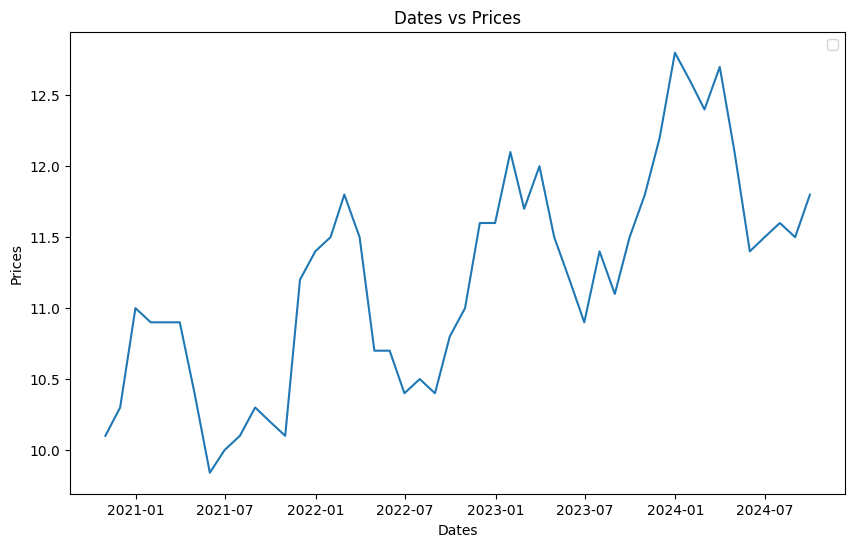

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(X ,Y)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Dates vs Prices')
plt.legend()
plt.show()


/tmp/ipython-input-581050316.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


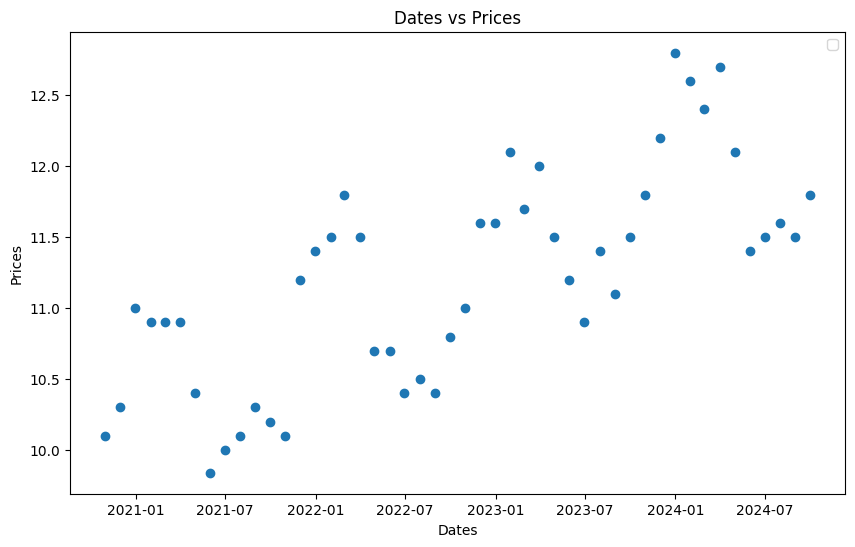

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X ,Y)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Dates vs Prices')
plt.legend()
plt.show()

In [9]:
df

,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#converting dates to numbers
df['Dates_numeric'] = df['Dates'].apply(lambda x: x.timestamp())

In [12]:
X_numeric = df['Dates_numeric']
y = df['Prices']
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(y_train.shape)


(38,)
(38,)


In [13]:
# Reshape X_train and X_test to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

X_train.shape

(38, 1)

In [14]:
Model0 = LinearRegression()
Model0.fit(X_train,y_train)

LinearRegression()

In [16]:
print(Model0.coef_)
print(Model0.intercept_)

[1.44110483e-08]
-12.827933038225192


/tmp/ipython-input-2398948751.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


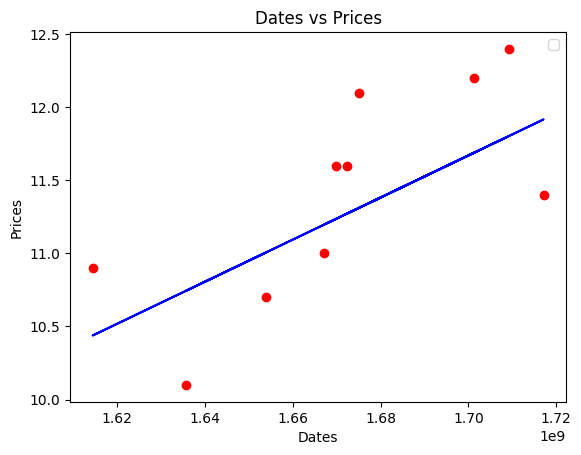

In [22]:
boi = Model0.predict(X_test)
plt.plot(X_test,boi, color = 'blue')
plt.scatter(X_test,y_test, color = 'red')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Dates vs Prices')
plt.legend()
plt.show()

/tmp/ipython-input-797213881.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


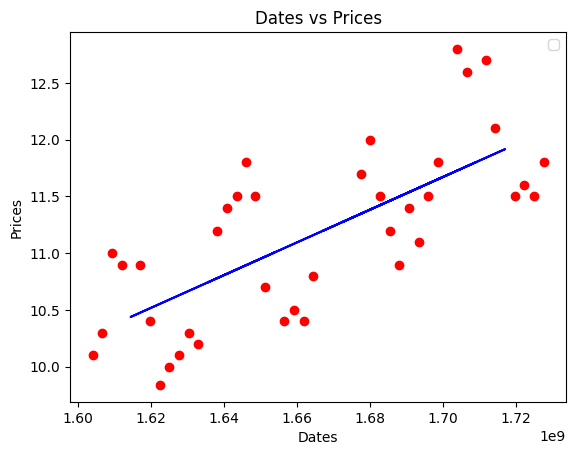

In [24]:
boi = Model0.predict(X_test)
plt.plot(X_test,boi, color = 'blue')
plt.scatter(X_train,y_train, color = 'red')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Dates vs Prices')
plt.legend()
plt.show()

In [26]:
Model0.score(X_test,y_test)


0.47805522769016184

/tmp/ipython-input-4250094344.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


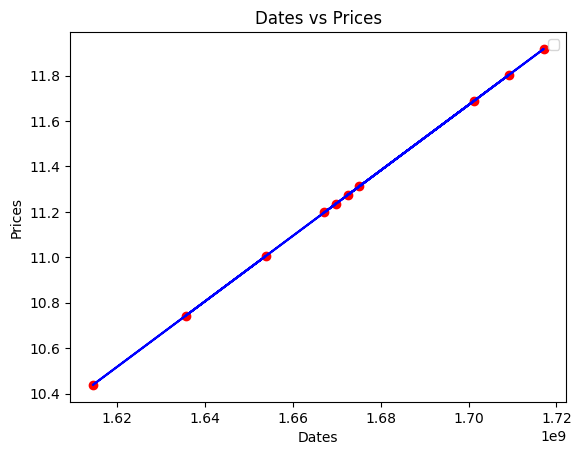

In [27]:
boi = Model0.predict(X_test)
plt.plot(X_test,boi, color = 'blue')
plt.scatter(X_test,Model0.coef_*X_test+Model0.intercept_, color = 'red')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Dates vs Prices')
plt.legend()
plt.show()


###Now we will use Seasonal amira or amira to cpature hidden trends